In [1]:
import pandas as pd
import pickle
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [5]:
trial = pd.read_pickle("../dataset/dataframes/voxc/voxc_trial.pkl")
sv_df = pd.read_pickle("../dataset/dataframes/voxc/sv_voxc_dataframe.pkl")

In [36]:
precise_frame_score = pickle.load(open("./cosine_scores_precise.pkl", "rb"))

In [37]:
trial['score'] = precise_frame_score

In [38]:
trial.head(3)

,label,enrolment,test,enrolment_id,test_id,frame_diff,nation_equal,gender_equal,score
0,1,Eartha_Kitt/x6uYqmx31kE_0000001,Eartha_Kitt/8jEAjG6SegY_0000008,138,36,112,True,True,0.823220
1,0,Eartha_Kitt/x6uYqmx31kE_0000001,Ernest_Borgnine/ize_eiCFEg0_0000003,138,3632,171,True,False,0.553098
2,1,Eartha_Kitt/x6uYqmx31kE_0000001,Eartha_Kitt/GWXujl-xAVM_0000017,138,83,615,True,True,0.887433


frame 차이에 따른 score 차이의 패턴이 보이지 않는다.

In [41]:
pos_trials = trial[(trial.label == 1)]
neg_trials = trial[(trial.label == 0)]

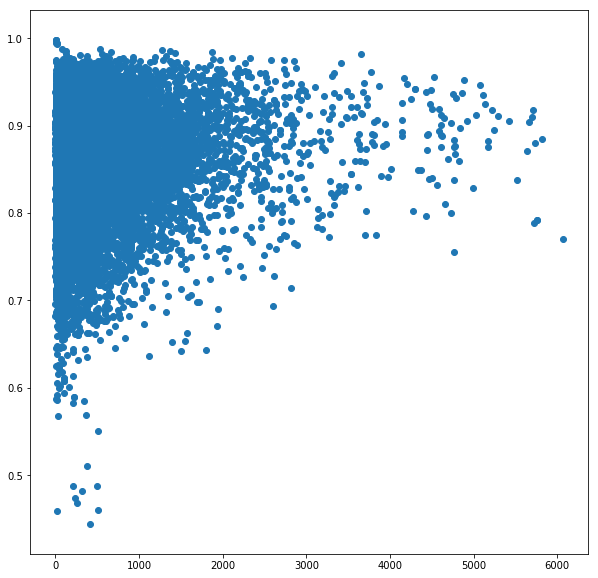

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(pos_trials.frame_diff, pos_trials.score)

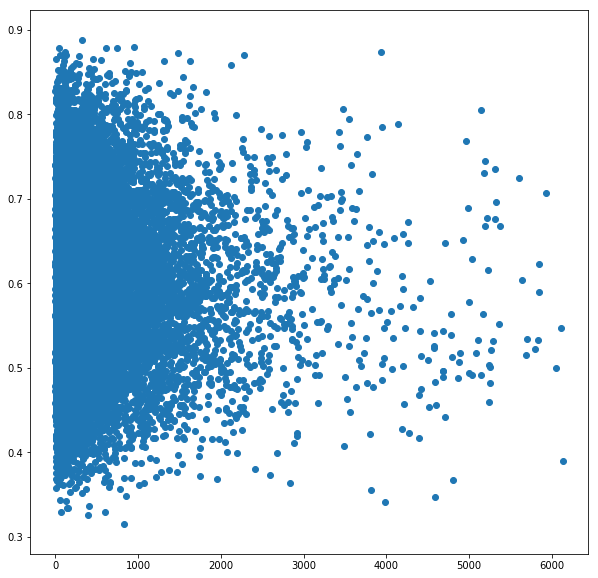

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(neg_trials.frame_diff, neg_trials.score)

### PLDA scores

In [124]:
plda_scores = pd.read_csv("./scores_voxceleb1/plda_scores", delimiter=' ', 
                          names = ['enrolment_id', 'test_id', 'score'])

In [114]:
from sklearn.preprocessing import MinMaxScaler
plda_score_array = np.array(plda_scores.score).reshape(-1, 1)
scalar = MinMaxScaler(feature_range=(0, 1))
scalar.fit(plda_score_array)

plda_norm_score = scalar.transform(plda_score_array)

In [125]:
# trial['plda_score'] = plda_norm_score
trial['plda_score'] = plda_scores.score

In [126]:
pos_trials = trial[(trial.label == 1)]
neg_trials = trial[(trial.label == 0)]

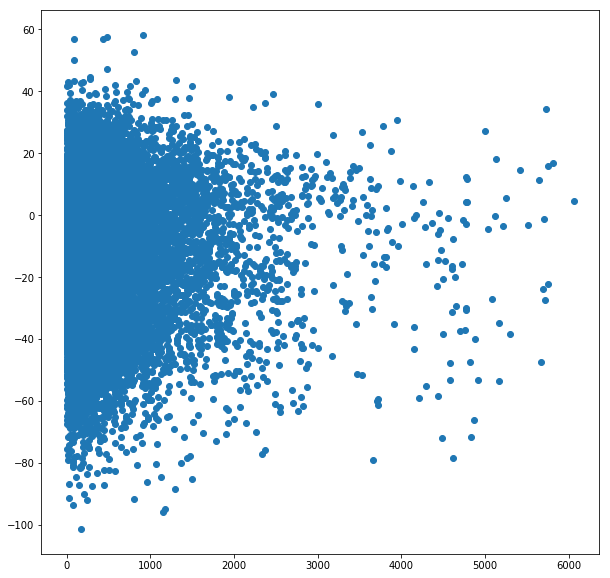

In [127]:
plt.figure(figsize=(10,10))
plt.scatter(pos_trials.frame_diff, pos_trials.plda_score)

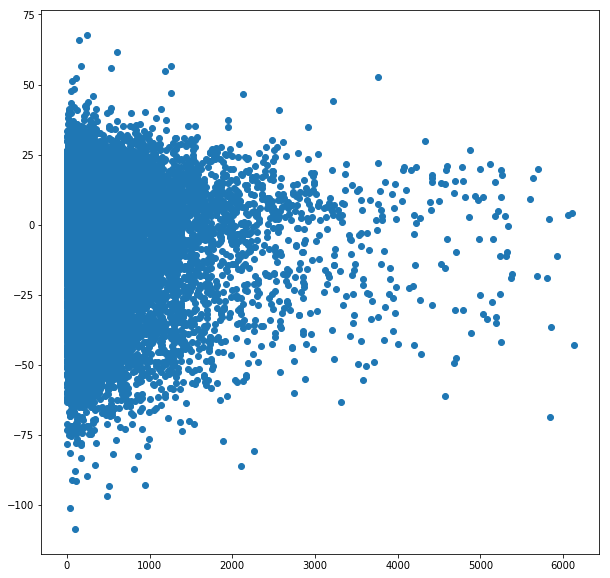

In [128]:
plt.figure(figsize=(10,10))
plt.scatter(neg_trials.frame_diff, neg_trials.plda_score)